In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

boston = load_boston()
X,y = boston.data, boston.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
lr =LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [2]:
y_pred = lr.predict(X_test)

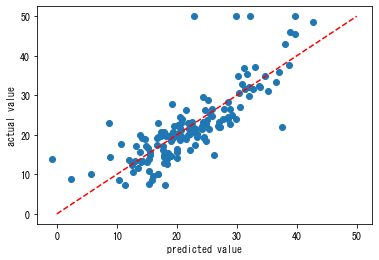

In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(y_pred, y_test)
ax.plot((0,50),(0,50), linestyle='dashed', color='red')
ax.set_xlabel('predicted value')
ax.set_ylabel('actual value')
plt.show()

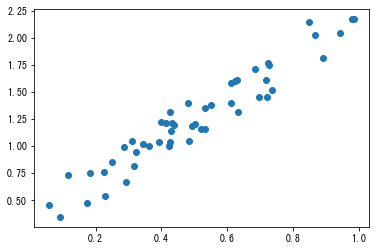

In [4]:
import numpy as np

np.random.seed(123)
X = np.random.random(size=50)
Y = 2*X + 0.5*np.random.rand(50)

fig, ax = plt.subplots()
ax.scatter(X,Y)
plt.show()

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(np.hstack((X[:,np.newaxis],Y[:,np.newaxis])))

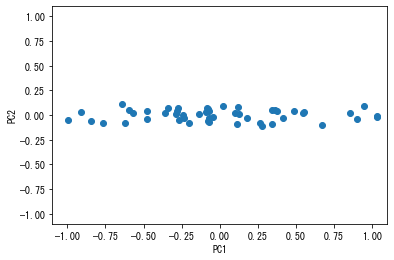

In [6]:
fig, ax = plt.subplots()
ax.scatter(X_pca[:,0], X_pca[:,1])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
plt.show()

In [7]:
from sklearn.datasets import load_iris
from sklearn.svm import SVC

iris = load_iris()
X,y = iris.data[:100,:], iris.target[:100]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=123)

svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [9]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [10]:
from sklearn.model_selection import cross_val_score
svc = SVC()

cross_val_score(svc, X, y, cv=10, scoring='precision')

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

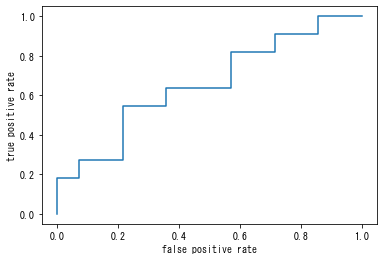

In [4]:
import numpy as np
import matplotlib.pyplot as plt

fpr = np.array([0,0,0,1,1,2,3,3,3,3,4,5,5,6,7,8,8,8,9,10,10,11,12,12,13,14])/14
tpr = np.array([0,1,2,2,3,3,3,4,5,6,6,6,7,7,7,7,8,9,9,9,10,10,10,11,11,11])/11

fig,ax = plt.subplots()
ax.step(fpr, tpr)
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
plt.show()

In [5]:
from sklearn.metrics import roc_curve

labels = np.array([1,1,0,1,0,0,1,1,1,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0])
probs = np.array([0.98,0.95, 0.9,0.87,0.85,0.8,0.75,0.71,0.63,0.55,0.51,0.47,0.43,0.38,0.35,0.31,0.28,0.24,0.22,0.19,0.15,0.12,0.08,0.04,0.01])
fpr, tpr, threshold = roc_curve(labels, probs)
print('fpr:', fpr)
print('tpr:', tpr)

fpr: [0.         0.         0.         0.07142857 0.07142857 0.21428571
 0.21428571 0.35714286 0.35714286 0.57142857 0.57142857 0.71428571
 0.71428571 0.85714286 0.85714286 1.        ]
tpr: [0.         0.09090909 0.18181818 0.18181818 0.27272727 0.27272727
 0.54545455 0.54545455 0.63636364 0.63636364 0.81818182 0.81818182
 0.90909091 0.90909091 1.         1.        ]


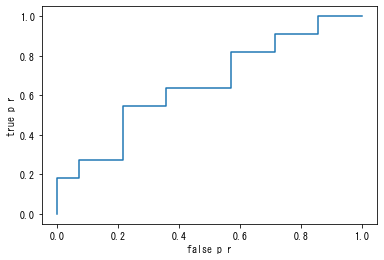

In [6]:
fig, ax = plt.subplots()
ax.step(fpr,tpr)
ax.set_xlabel('false p r')
ax.set_ylabel('true p r')
plt.show()

In [7]:
from sklearn.metrics import roc_auc_score
roc_auc_score(labels, probs)

0.6558441558441558

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X,y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123)

clf = DecisionTreeClassifier()
param_grid = {'max_depth':[3,4,5]}
cv = GridSearchCV(clf,param_grid=param_grid, cv=10)
cv.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5]})

In [11]:
cv.best_params_

{'max_depth': 3}

In [12]:
cv.best_estimator_

DecisionTreeClassifier(max_depth=3)

In [13]:
y_pred = cv.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

In [15]:
iris = load_iris()
data = iris.data
X=data[:100,[0,2]]

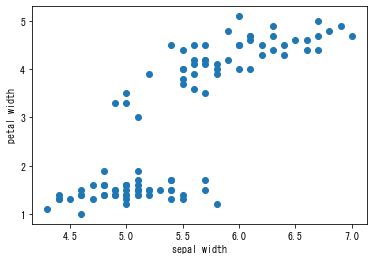

In [18]:
fig , ax = plt.subplots()
ax.scatter(X[:,0], X[:,1])
ax.set_xlabel('sepal width')
ax.set_ylabel('petal width')
plt.show()

In [19]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3, init='random', n_init=10, random_state=123)
y_km = km.fit_predict(X)

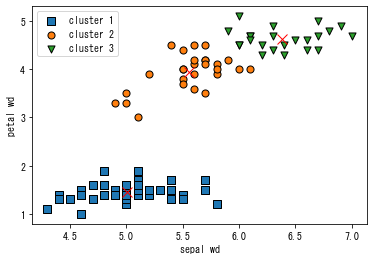

In [20]:
fig, ax = plt.subplots()
ax.scatter(X[y_km==0,0], X[y_km==0,1], s=50, edgecolor='black', marker='s', label='cluster 1')
ax.plot(np.mean(X[y_km==0,0]), np.mean(X[y_km==0,1]),marker='x', markersize=10,color='red')

ax.scatter(X[y_km==1,0], X[y_km==1,1], s=50, edgecolor='black', marker='o', label='cluster 2')
ax.plot(np.mean(X[y_km==1,0]), np.mean(X[y_km==1,1]),marker='x', markersize=10,color='red')

ax.scatter(X[y_km==2,0], X[y_km==2,1], s=50, edgecolor='black', marker='v', label='cluster 3')
ax.plot(np.mean(X[y_km==2,0]), np.mean(X[y_km==2,1]),marker='x', markersize=10,color='red')

ax.set_xlabel('sepal wd')
ax.set_ylabel('petal wd')
ax.legend()
plt.show()

In [21]:
from sklearn.cluster import AgglomerativeClustering
ac= AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
labels = ac.fit_predict(X)
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0], dtype=int64)

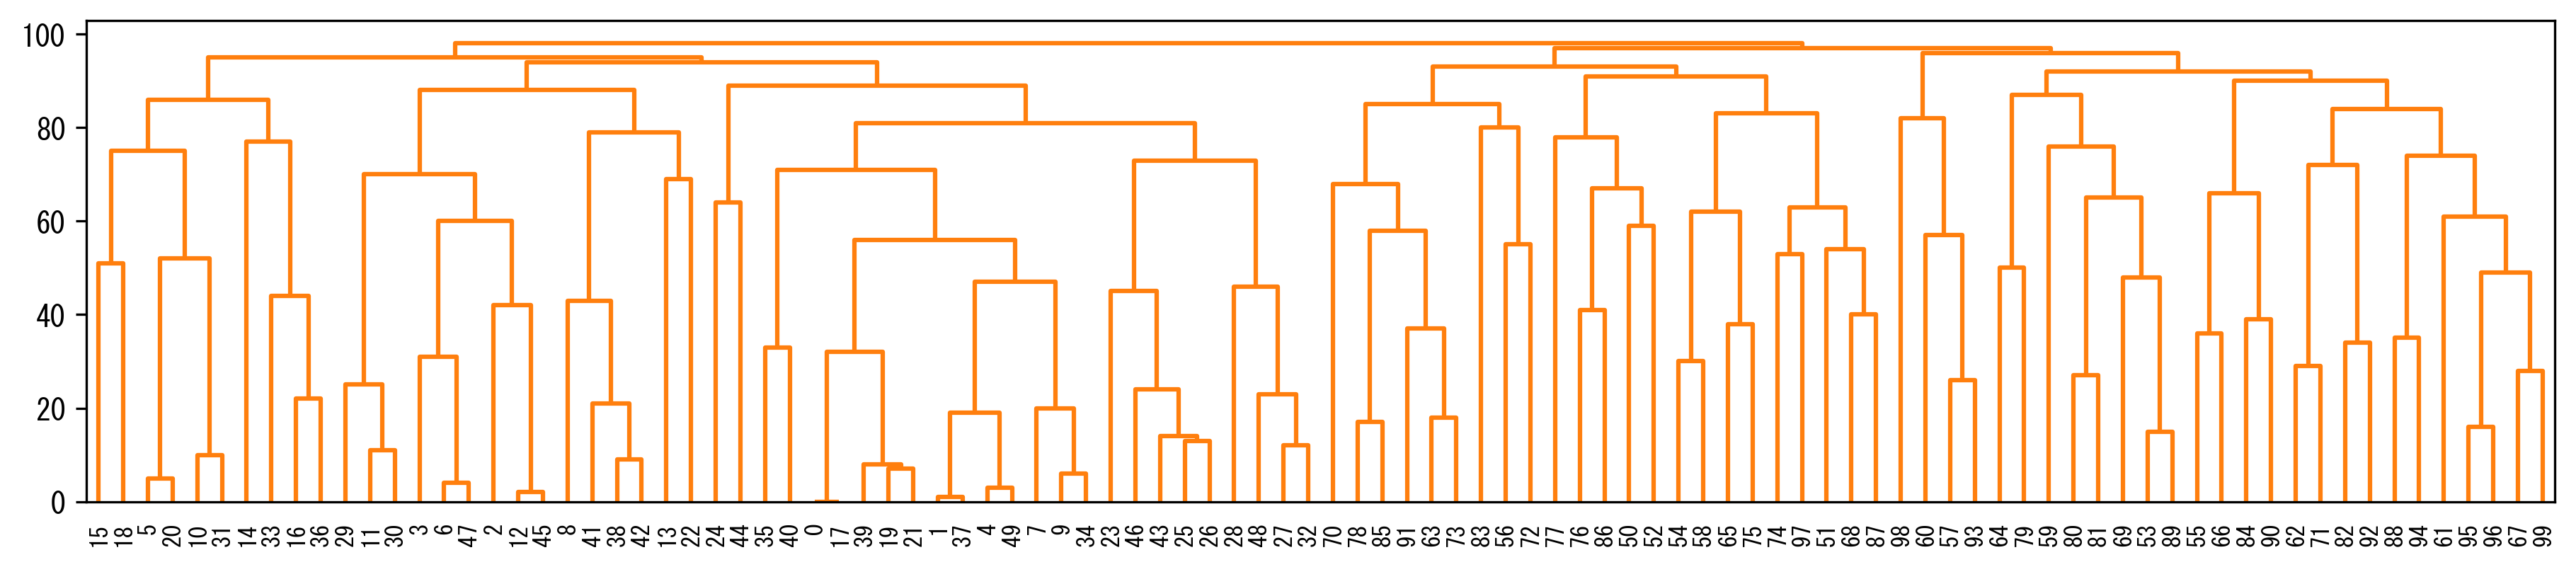

In [22]:
from scipy.cluster.hierarchy import dendrogram
children = ac.children_

distance = np.arange(children.shape[0])
no_of_observations = np.arange(2,children.shape[0]+2)
linkage_matrix = np.hstack((children,distance[:,np.newaxis],
                           no_of_observations[:,np.newaxis])).astype(float)

fig,ax = plt.subplots(figsize=(15,3),dpi=300)
dendrogram(linkage_matrix, labels=np.arange(100), leaf_font_size=8, color_threshold=np.inf)
plt.show()